#**AdaBoost implementation using Decision Trees from scratch as Weak Learners**

**Decision Tree Classifier:**
  - Started by training a decision tree (with a max depth of 1, a typical weak learner in AdaBoost) on a dataset with two features (X1 and X2) and a label column (label).

**Weights Update (AdaBoost Process):**
  - After training the decision tree, computed the error of the model, calculated the model weight (alpha), and updated the sample weights. This is part of the AdaBoost algorithm's iterative process.
  - Model Weights (Alpha): Each weak learner (decision tree) gets a weight (alpha) based on its error rate. The higher the weight, the more influence that model has on the final prediction.
  - Update Weights: After each tree is trained, the weights of the samples are updated based on whether they were correctly classified or not. Misclassified samples have their weights increased.

**Resampling Based on Weights:**
  - After updating the sample weights, resampled the dataset to create a new dataset for the next iteration, where misclassified samples have higher weights and are more likely to be selected in the new dataset.
  - Resampling: The dataset is resampled based on the updated weights. Misclassified samples are more likely to be selected in the next iteration.

**Train a Second Decision Tree:**
  - Trained a second decision tree on the newly created dataset with updated weights.

**Final Predictions:**
  - Used the trained decision trees to make predictions on the data, combining them based on their model weights (alpha values) to give a final prediction.
  - Final Prediction: The predictions from each weak learner are combined using the model weights to make a final prediction. We use the sign of the weighted sum to determine the final output, as is typical in AdaBoost.

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier

**Load Dataset**

In [2]:
# Create the dataset
df = pd.DataFrame({
    'X1': [1,2,3,4,5,6,6,7,9,9],
    'X2': [5,3,6,8,1,9,5,8,9,2],
    'label': [1,1,0,1,0,1,0,1,0,0]
})

In [3]:
# Initialize uniform weights
df['weights'] = 1 / df.shape[0]

In [4]:
# Train a decision tree as the first weak learner
dt1 = DecisionTreeClassifier(max_depth=1)
X = df[['X1', 'X2']].values
y = df['label'].values
dt1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

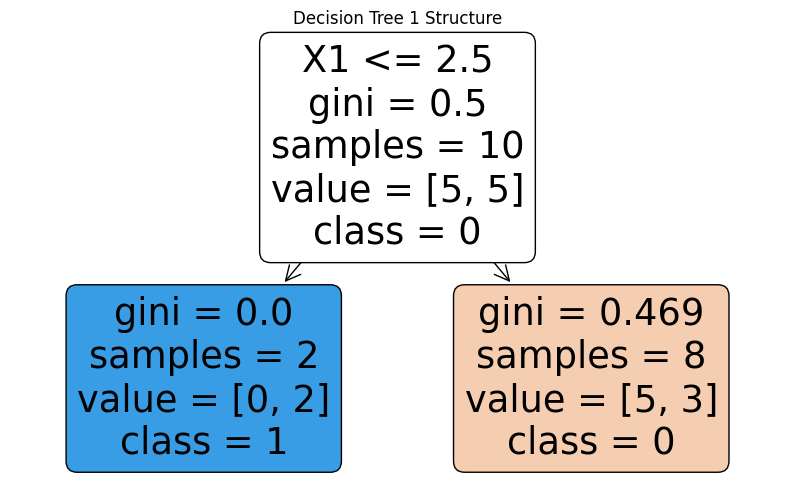

In [5]:
# Plot tree structures
plt.figure(figsize=(10, 6))
plot_tree(dt1, filled=True, feature_names=['X1', 'X2'], class_names=['0', '1'], rounded=True)
plt.title("Decision Tree 1 Structure")
plt.show()

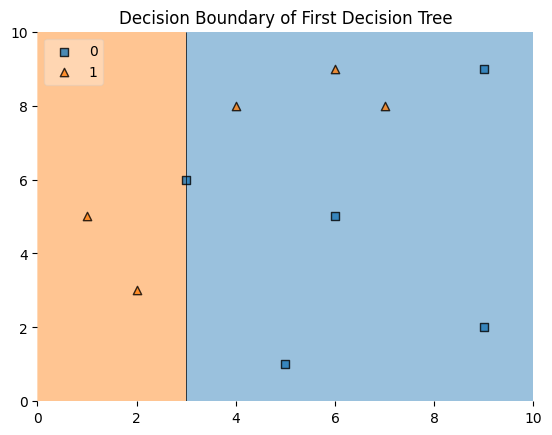

In [6]:
# Plot decision boundary
plot_decision_regions(X, y, clf=dt1, legend=2)
plt.title("Decision Boundary of First Decision Tree")
plt.show()

In [7]:
# Predict using the first decision tree
df['y_pred'] = dt1.predict(X)

In [8]:
# Function to calculate model weight (alpha)
def calculate_model_weight(error):
    return 0.5 * np.log((1 - error) / error)

In [9]:
# Calculate error and model weight (alpha1)
error1 = np.sum(df['weights'] * (df['label'] != df['y_pred'])) / np.sum(df['weights'])
alpha1 = calculate_model_weight(error1)
print(f"Alpha1 (model weight for first tree): {alpha1}")

Alpha1 (model weight for first tree): 0.4236489301936017


In [10]:
# Update sample weights
def update_weights(row, alpha):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

df['updated_weights'] = df.apply(update_weights, alpha=alpha1, axis=1)

In [11]:
# Normalize updated weights
df['normalized_weights'] = df['updated_weights'] / df['updated_weights'].sum()

In [12]:
# Resampling based on the updated weights
def create_new_dataset(df):
    indices = []
    for _ in range(df.shape[0]):
        rand_val = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > rand_val > row['cumsum_lower']:
                indices.append(index)
                break
    return indices

df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [13]:
# Resample the dataset
resampled_indices = create_new_dataset(df)
second_df = df.iloc[resampled_indices].copy()

In [14]:
# Train second decision tree on resampled dataset
dt2 = DecisionTreeClassifier(max_depth=1)
X_resampled = second_df[['X1', 'X2']].values
y_resampled = second_df['label'].values
dt2.fit(X_resampled, y_resampled)

DecisionTreeClassifier(max_depth=1)

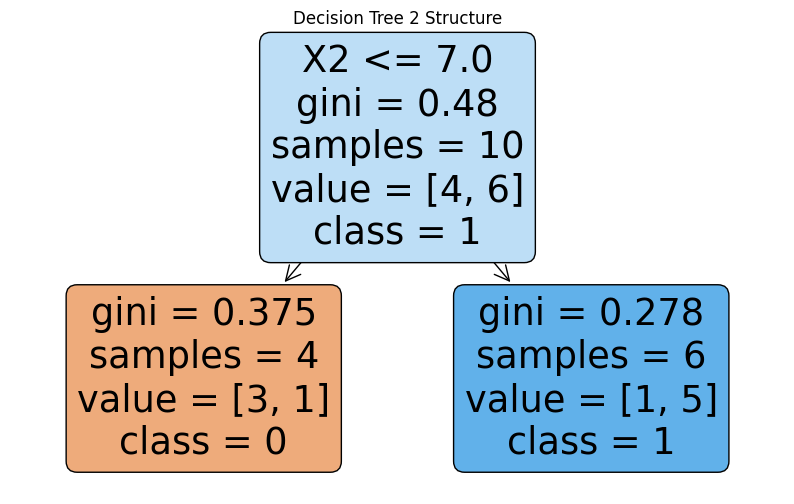

In [15]:
# Plot tree structures
plt.figure(figsize=(10, 6))
plot_tree(dt2, filled=True, feature_names=['X1', 'X2'], class_names=['0', '1'], rounded=True)
plt.title("Decision Tree 2 Structure")
plt.show()

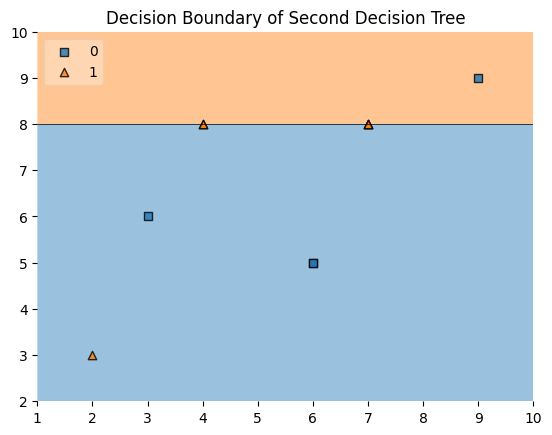

In [16]:
# Plot decision boundary for second tree
plot_decision_regions(X_resampled, y_resampled, clf=dt2, legend=2)
plt.title("Decision Boundary of Second Decision Tree")
plt.show()

In [17]:
# Predict using the second decision tree
second_df['y_pred'] = dt2.predict(X_resampled)

In [18]:
# Calculate error and model weight (alpha2)
error2 = np.sum(second_df['weights'] * (second_df['label'] != second_df['y_pred'])) / np.sum(second_df['weights'])
alpha2 = calculate_model_weight(error2)
print(f"Alpha2 (model weight for second tree): {alpha2}")

Alpha2 (model weight for second tree): 0.6931471805599453


In [19]:
# Final Prediction on a Query Point
query_point = np.array([9, 9]).reshape(1, -2)

In [20]:
# Prediction from each decision tree
prediction1 = dt1.predict(query_point)
prediction2 = dt2.predict(query_point)

In [21]:
# Final weighted prediction (AdaBoost style)
# Since predictions are 0 or 1, we'll use the sign of the weighted sum
# Convert 0 to -1 for calculations
prediction1 = np.where(prediction1 == 0, -1, 1)
prediction2 = np.where(prediction2 == 0, -1, 1)

In [22]:
# Final prediction using the weighted sum of individual predictions
final_prediction = np.sign(alpha1 * prediction1 + alpha2 * prediction2)

In [23]:
# Convert -1 back to 0
final_prediction = np.where(final_prediction == -1, 0, 1)
print(f"Final Prediction for query point {query_point[0]}: {final_prediction[0]}")

Final Prediction for query point [9 9]: 1
